# DATA IMPORT

In [21]:
# Describe the dataset and any issues with it

#A data frame with 10,000 observations on the following 55 variables
# The Dataset has information about 
The purpose of the loan is mostly for Debt_consolidation, Credit_Card and Home Improvement and other. Least reason is for renewable energy 
debt_consolidation    5144
credit_card           2249
other                  914
home_improvement       680

#Data issues: 
The conclusions can be biased because of less information about joint accounts also 

SyntaxError: invalid syntax (<ipython-input-21-73b1761928e5>, line 5)

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('loans_full_schema.csv')

# DATA CLEANING :

Of all the 55 variables, Emp_Title ( JobTitle), month in which the loan is issued, state, grade and subgrade of the loan, months since last credit inquiry seemed to be of less importance in the data so I have dropped them.

We find that in the columns annual_income_joint, verification_income_joint ,debt_to_income_joint more than 95% of the data is missing. All the three columns are pertaining to the joint account. Keeping them and replacing the null values will not give much information about the joint accounts. So I have dropped all the three of them.

The column delinq_2y gives the information of delinquency to us about the customer or applicant, The months_since_last_delinq variable is not needed to know more on delinquency since our concentration is on the interest rate and other factors. 

More than 90% of the data in the column : months_since_90d_late is missing, So I have dropped the column from the dataset.

The variable- Number of current accounts that are 120 days past due has only a single value 0 which doesnot contribute much to the analysis. So I have dropped it.

We can find that 9948 applicants haven't paid late fees, So it doesnt contribute much on analysis of the data.

Almost all the customers have initial listing status as whole. Which means most of the applicants received the loan completly from the lender.So I have dropped this column



In [2]:
df = df.drop('emp_title', axis = 1)
df = df.drop('issue_month', axis = 1)
df = df.drop('state', axis = 1)
df = df.drop('grade', axis = 1)
df = df.drop('sub_grade', axis = 1)
df = df.drop('annual_income_joint', axis = 1)
df = df.drop('verification_income_joint', axis = 1)
df = df.drop('debt_to_income_joint', axis = 1)
df = df.drop('months_since_last_delinq', axis = 1)
df = df.drop('months_since_90d_late', axis = 1)
df = df.drop('months_since_last_credit_inquiry', axis = 1)
df = df.drop('num_accounts_120d_past_due', axis = 1)
df = df.drop('paid_late_fees', axis = 1)
df = df.drop('initial_listing_status', axis = 1)
df = df.drop('loan_purpose', axis = 1)

<AxesSubplot:>

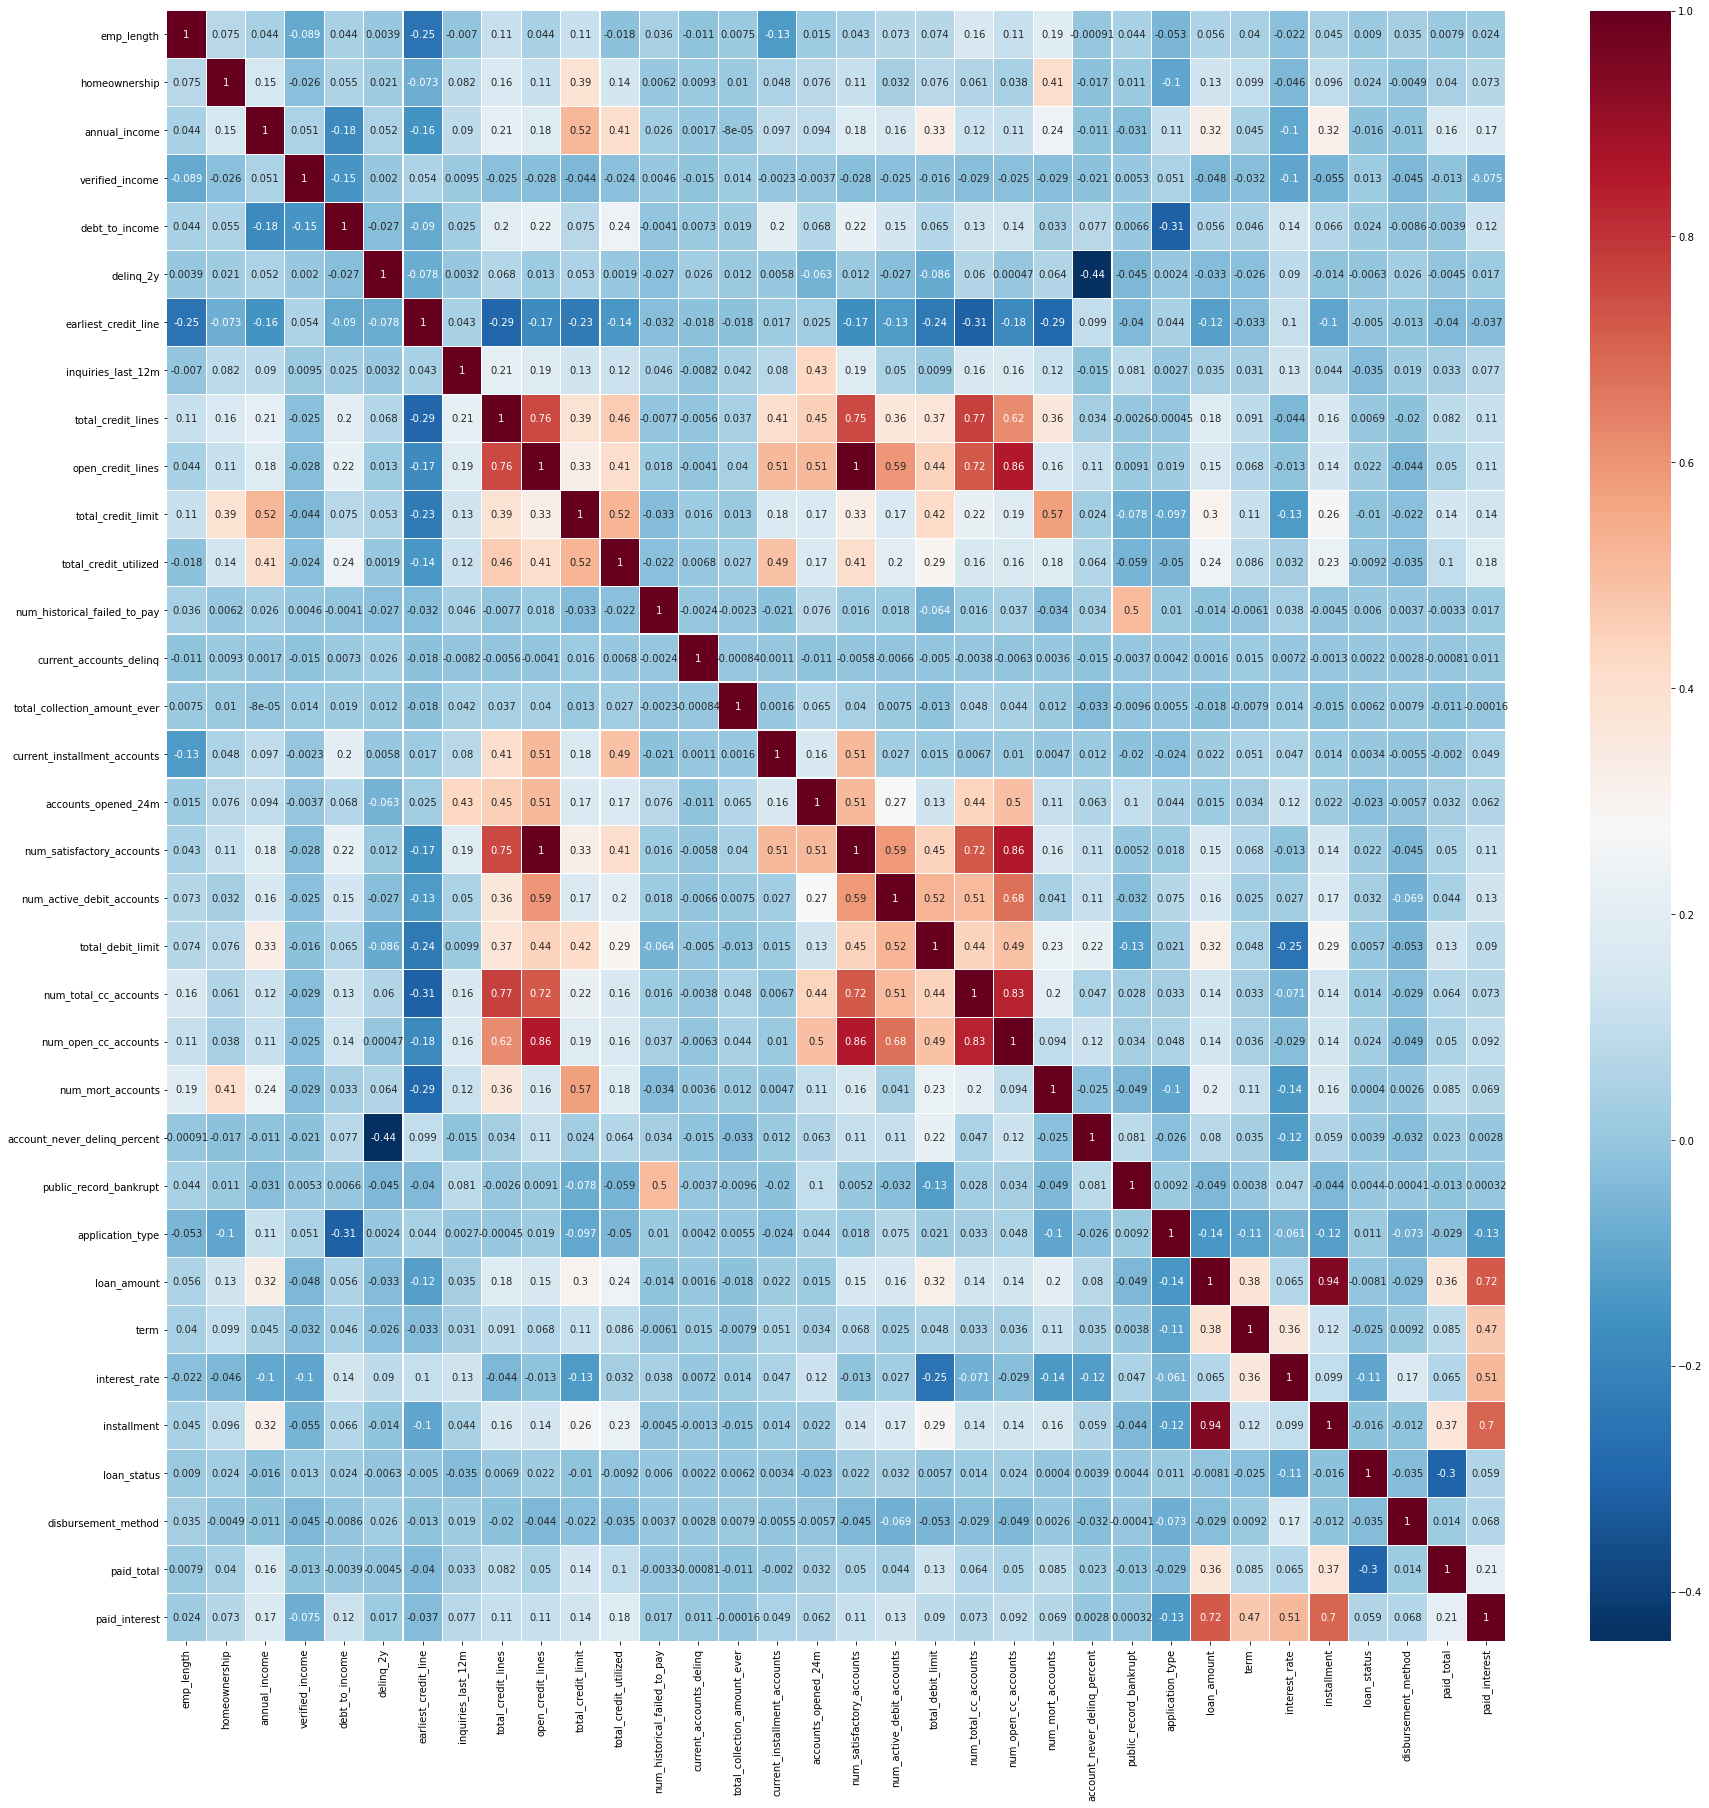

In [14]:
# Correlation plot
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr()
fig,ax = plt.subplots(figsize=(30,30))
sns.heatmap(df_corr, annot=True,cmap="RdBu_r",linewidths=0.15,ax=ax)

From the correlation plot we can see that the data set contains few highly correlated variables. So one amongst the following can be used for further analysis

Balance & loan amount

Paid total & paid_principal

Balance & Installment

Number of collections in the last 12 months and tax liens 

num_cc_carrying_balance and num_open_cc_accounts are highly correlated.

In [ ]:
df = df.drop('balance', axis = 1)
df = df.drop('num_collections_last_12m', axis = 1)
df = df.drop('tax_liens', axis = 1)
df = df.drop('paid_principal', axis = 1)
df = df.drop('num_cc_carrying_balance', axis = 1)
df = df.drop('num_accounts_30d_past_due', axis = 1)
df = df.drop('num_accounts_30d_past_due', axis = 1)

<b> Replacing the null values </b> 
    
Now there are two columns where I have replaced the null values with the mean and mode values of the variable.

In [3]:
df.emp_length  = df.emp_length.replace({np.nan : 10.0}) # Mode of the data 
df.debt_to_income  = df.debt_to_income.replace({np.nan :19.308191659983976 }) # Mean of the data

# DATA TRANSFORMATION :

Convert all the categorical and ordinal data to numeric for further data analysis 

In [4]:
df['homeownership'] = df['homeownership'].map({'MORTGAGE':2, 'RENT':1,'OWN' : 0 }).astype(int)
df['verified_income'] = df['verified_income'].map({'Source Verified':2, 'Not Verified':1,'Verified' : 0 }).astype(int)
df.application_type = df.application_type.replace({'individual': 1,'joint' : 0})
df['loan_status'] = df['loan_status'].map({'Current':5 , 'Fully Paid': 4,'In Grace Period' : 3,'Late (31-120 days)' : 2, 'Late (16-30 days)': 1, 'Charged Off': 0}).astype(int)
df.application_type = df.application_type.replace({ 36:  1, 60 : 0})
df.disbursement_method = df.disbursement_method.replace({ 'Cash':1 ,'DirectPay':0})

Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing

In [8]:
df

,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,...,loan_amount,term,interest_rate,installment,loan_status,disbursement_method,balance,paid_total,paid_principal,paid_interest
0,3.0,2,90000.0,0,18.01,0,2001,6,28,10,...,28000,60,14.07,652.53,5,1,27015.86,1999.33,984.14,1015.19
1,10.0,1,40000.0,1,5.04,0,1996,1,30,14,...,5000,36,12.61,167.54,5,1,4651.37,499.12,348.63,150.49
2,3.0,1,40000.0,2,21.15,0,2006,4,31,10,...,2000,36,17.09,71.40,5,1,1824.63,281.80,175.37,106.43
3,1.0,1,30000.0,1,10.16,0,2007,0,4,4,...,21600,36,6.72,664.19,5,1,18853.26,3312.89,2746.74,566.15
4,10.0,1,35000.0,0,57.96,0,2008,7,22,16,...,23000,36,14.07,786.87,5,1,21430.15,2324.65,1569.85,754.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,1,108000.0,2,22.28,0,2008,5,44,13,...,24000,36,7.35,744.90,5,1,21586.34,2969.80,2413.66,556.14
9996,8.0,2,121000.0,0,32.38,4,1994,1,28,15,...,10000,36,19.03,366.72,5,1,9147.44,1456.31,852.56,603.75
9997,10.0,2,67000.0,0,45.26,2,2004,0,18,11,...,30000,36,23.88,1175.10,5,1,27617.65,4620.80,2382.35,2238.45
9998,1.0,2,80000.0,2,11.99,0,1999,1,38,15,...,24000,36,5.32,722.76,5,1,21518.12,2873.31,2481.88,391.43


# DATA VISUALIZATION

Visualization 1: 

<AxesSubplot:xlabel='application_type', ylabel='public_record_bankrupt'>

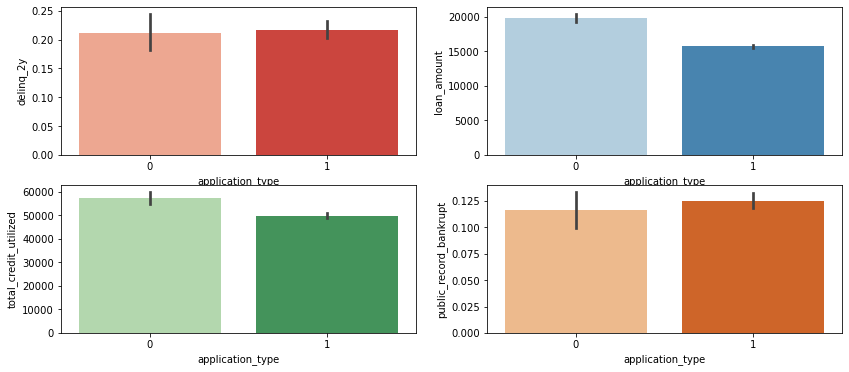

In [24]:
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.barplot(x='application_type',y='delinq_2y',data= df,palette='Reds')
plt.subplot(2,2,2)
sns.barplot(x='application_type',y='loan_amount',data= df,palette='Blues')
plt.subplot(2,2,3)
sns.barplot(x='application_type',y='total_credit_utilized',data= df,palette='Greens')
plt.subplot(2,2,4)
sns.barplot(x='application_type',y='public_record_bankrupt',data= df,palette='Oranges')

The above subplots give the information about the relation between individual and joint application types with delinq_2y,loan_amount,total_credit_utilized,interest_rate. 
We can say that :

Joint application type has more Delinquencies and public recorded bankruptcies.

People with Individual application type have taken more loan_amount and have utilized their credit and also have good background of paying the total amount back.

Hence joint account holders are a higher risk to the indivuals in terms of Delinquencies on lines of credit in the last 2 years and bankruptcies and Individal application holders are more reliable. 

Visualization 2 :

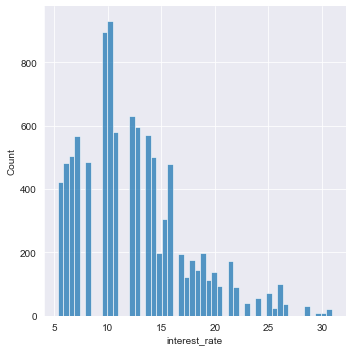

In [47]:
import seaborn as sns
sns.set_style('darkgrid')
sns.displot(df.interest_rate)

We find that in the data most of the applicants received loans around 10% interest rate 

Visualization 3 :

In [ ]:
import numpy as np

df = pd.DataFrame(np.random.rand(10, 4), columns=["", "loan_status"])

df.plot.bar();

<AxesSubplot:xlabel='loan_status', ylabel='annual_income'>

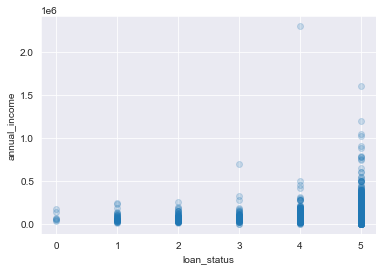

In [53]:
sns.regplot(x = "loan_status", y="annual_income", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

From the above plot we can infer that people with higher annual income tend to be in fully paid or with current loan status.But people with lower annual income tend to be late :  Late (31-120 days)' or  Late (16-30 days). This shows its always safe to give loans to people with better annual income 

Visualization 4 :

C:\Users\saisr\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


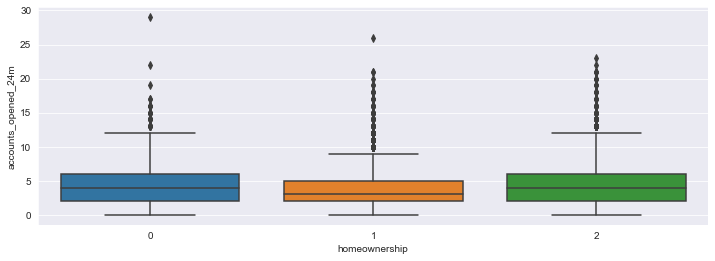

In [59]:
plt.figure(figsize=(12, 4))
x = df.homeownership
y = df.accounts_opened_24m
a = sns.boxplot(x,y)

Home ownership : 0: Own house ; 1: Rent ; 2: Mortgage 
                
People with own house are more probable to take loans, than people with rented houses. 

C:\Users\saisr\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


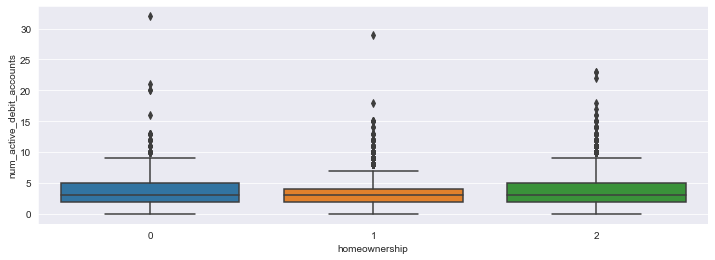

In [60]:
plt.figure(figsize=(12, 4))
x = df.homeownership
y = df.num_active_debit_accounts
a = sns.boxplot(x,y)

People with own houses have higher number of active debit accounts compared to others. From both the above graphs we can infer that even though people with own houses are less in number they have opened more accounts 

Visualization : 5 

In [ ]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)



In [26]:
df.columns

Index(['emp_length', 'homeownership', 'annual_income', 'verified_income',
       'debt_to_income', 'delinq_2y', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_historical_failed_to_pay', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'num_satisfactory_accounts',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts', 'num_mort_accounts',
       'account_never_delinq_percent', 'public_record_bankrupt',
       'application_type', 'loan_amount', 'term', 'interest_rate',
       'installment', 'loan_status', 'disbursement_method', 'paid_total',
       'paid_interest'],
      dtype='object')

In [41]:

top_medians = df[df["Median"] > 60000].sort_values("Median")
plt(x="emp_length", y=["homeownership", "annual_income"], kind="bar")

TypeError: 'module' object is not callable

In [ ]:
Most of the 

In [27]:
df.loan_status.value_counts()

5    9375
4     447
3      67
2      66
1      38
0       7
Name: loan_status, dtype: int64

In [ ]:
We find that the loan status and employemnt length 


Create a feature set and create a model which predicts interest rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data. 

Visualize the test results and propose enhancements to the model, what would you do if you had more time. Also describe assumptions you made and your approach. 